# Deep Learning for Computer Vision:  HW 4

## Computer Science: COMS W 4995 007

### Due: October 31, 2019

### Problem

In this notebook we provide three networks for classifying handwritten digits from the MNIST dataset. The networks are implemented and tested using the Tensorflow framework. The third and final network is a convolutional neural network (CNN aka ConvNet) which achieves 99.25% accuracy on this dataset. 

Your task is to re-implement all three networks using Pytorch. You will likely find several Pytorch implementations on the internet. It is ok to study these. However, you must not cut and paste this code into your assignment--you must write this yourself. Furthermore, you need to comment every line of code and succintly explain what it is doing! 

Here is what is required:

a) A FULLY commented re-implementation of the networks below using the Pytorch.

b) your network trained on the same MNIST data as used here.

c) an evaluation of the accuracy on the MNIST test set.

d) plots of 10 randomly selected digits from the test set along with the correct label and the assigned label.

e) have your training record a log of the validation loss and validation accuracy. 

f) have your training continually save the best model so far (as determined by the validation loss).

g) after training, load the saved weights using the best model so far. re-run you accuracy evaluation using these saved weights.

Below we include the Tensorflow examples shown in class.

### A Simple Convolutional Neural Network in Tensorflow

This notebook covers a python and tensorflow-based solution to the handwritten digits recognition problem. It is based on tensorflow tutorials and Yann LeCun's early work on CNN's. This toturial compares a simple softmax regressor, a multi-layer perceptron (MLP), and a simple convolutional neural network (CNN).

Load in the MNIST digit dataset directly from tensorflow examples.

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). 

Let's import tensorflow and begin an interactive session.

In [0]:
import tensorflow as tf
sess = tf.InteractiveSession()

## Softmax Regression Model on the MNIST Digits Data

We need to create placeholders for the data. Data will be dumped here when it is batched from the MNIST dataset.

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Now let's see what this data looks like.

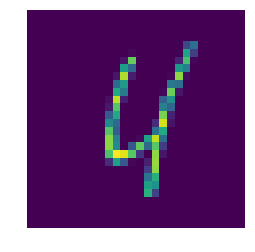

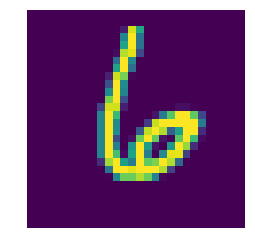

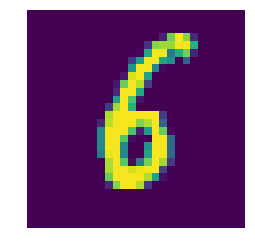

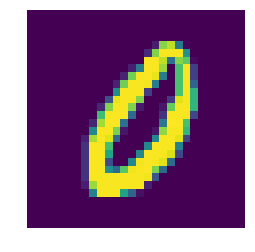

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(4):
    batch = mnist.test.next_batch(1)
    image = np.asarray(batch[0]).reshape((28, 28))
    label = batch[1]
    
    plt.imshow(image)
    plt.axis("off")
    plt.show()

We are first going to do softmax logistic regression. This is a linear layer followed by softmax. Note there are NO hidden layers here. Also note that the digit images (28x28 grayscale images) are reshaped into a 784 element vector. 

Below we create the parameters (weights) for our linear layer.

In [0]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

We then use tensorflows initializer to initialize these weights.

In [0]:
sess.run(tf.global_variables_initializer())

We create our linear layer as a function of the input and the weights.

In [0]:
y_regressor = tf.matmul(x,W) + b

Below we create our loss function. Note that the cross entropy is $ H_{\hat{y}}(y) = -\sum_i \hat{y}_{i} \, \log(y_{i})$ where $\hat{y}$ is the true probability distribution and is expressed as a one-hot vector, $y$ is the estimated probability distribution, and $i$ indexes elements of these two vectors. Also note that this reduces to $ H_{\hat{y}}(y) = -\, \log(y_{i^*})$ where $i^*$ is the correct label. And if we sum this over all of our samples indexed by $j$, then $H_{\hat{y}}(y) = -\sum_j  \log(y^{(j)}_{i^*})$. This is precisely the same loss function as we used before, but we called the MLE loss. They are one and the same.

In [0]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_regressor))

Now we tell tf to use gradient descent with a step size of 0.5 and to minimize the cross entropy.

In [0]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

We train by grabbing mini-batches with 100 samples each and pushing these through the network to update our weights (W and b).

In [0]:
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

We define how to compute correct predicitions.

In [0]:
correct_prediction = tf.equal(tf.argmax(y_regressor,1), tf.argmax(y_,1))

And from these correct predictions how to compute the accuracy.

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9192


Let's print out some test images and the corresponsing predictions made by the network. But first, let's add an output to the computation graph that computes the softmax probabilities.

In [0]:
y_probs_regressor = tf.nn.softmax(logits=y_regressor, name=None)

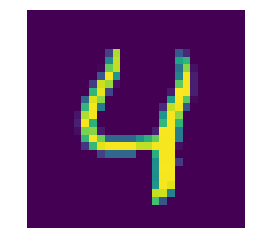

Label =  [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
Class probabilities =  [[  1.67203823e-03   6.03468334e-06   6.42732251e-03   1.87764294e-04
    9.26438749e-01   4.59894276e-04   3.28759407e-03   1.33758076e-02
    5.87336766e-03   4.22714762e-02]]


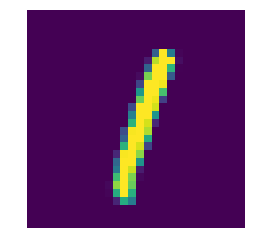

Label =  [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
Class probabilities =  [[  9.20873049e-07   9.87897158e-01   2.22241855e-03   1.86755520e-03
    3.91291178e-05   9.39880556e-05   3.30834628e-05   3.73039884e-03
    3.64026078e-03   4.75243636e-04]]


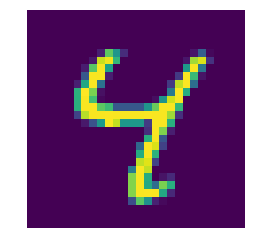

Label =  [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
Class probabilities =  [[  5.94127778e-06   1.63856862e-06   2.03961849e-06   2.16156419e-04
    9.74607527e-01   5.81776584e-03   5.42712551e-05   1.18222029e-03
    1.06608802e-02   7.45144626e-03]]


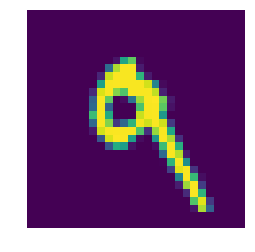

Label =  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Class probabilities =  [[  1.32794867e-06   3.03926598e-03   1.02855719e-03   3.06596723e-03
    1.28692212e-02   9.07216594e-03   2.42878319e-04   1.96316512e-03
    6.66321721e-03   9.62054253e-01]]


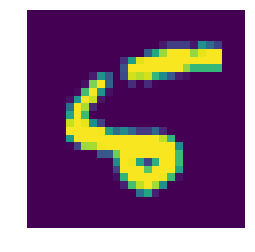

Label =  [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]
Class probabilities =  [[  8.77247099e-03   5.61122533e-06   5.13427751e-03   1.86741403e-07
    6.87260833e-03   3.76259210e-03   9.73673403e-01   4.59226328e-07
    1.65836595e-03   1.20098288e-04]]


In [0]:
for i in range(5):
    batch = mnist.test.next_batch(1)
    image = np.asarray(batch[0]).reshape((28, 28))
    label = batch[1]
    
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    print "Label = ", label
    print "Class probabilities = ", y_probs_regressor.eval(feed_dict={
        x: batch[0], y_: batch[1]})

## Softmax Multi-Layer Perceptron on the MNIST Digits Data

Here we define both weight and bias variables and how they are to be initialized. Note that the weights are are distributed according to a standard normal distribution (mean = 0, std = 0.1). This random initialization helps avoid hidden units get stuck together, as units that start with the same value will be updated identically in the non-convolutional layers. In contrast, the bias variables are set to a small positive number--this is help prevent hidden units from starting out and getting stuck in the zero part of the ReLU. 

In [0]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

Next we create placeholders for the training data.

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

We create the first and only fully connected hidden layer.

In [0]:
W_h = weight_variable([784, 512])
b_h = bias_variable([512])
h = tf.nn.relu(tf.matmul(x, W_h) + b_h)

We create the output layer.

In [0]:
W_out = weight_variable([512, 10])
b_out = bias_variable([10])
y_MLP = tf.matmul(h, W_out) + b_out

We again use cross entropy loss on a softmax distribution on the outputs.

In [0]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_MLP))

For training we choose an Adam learning rate and update rule. We then run this for 20,000 iterations and evaluate our accuracy after training. Note this softmax MLP network does quite a bit bettter than our softmax regressor. The non-linear layer really helps makes sense of the data! But we can do better still...

In [0]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_MLP,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%1000 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1]})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

step 0, training accuracy 0.2
step 1000, training accuracy 0.9
step 2000, training accuracy 0.9
step 3000, training accuracy 0.98
step 4000, training accuracy 0.98
step 5000, training accuracy 0.94
step 6000, training accuracy 0.96
step 7000, training accuracy 1
step 8000, training accuracy 0.96
step 9000, training accuracy 1
step 10000, training accuracy 0.98
step 11000, training accuracy 1
step 12000, training accuracy 0.94
step 13000, training accuracy 0.98
step 14000, training accuracy 1
step 15000, training accuracy 0.96
step 16000, training accuracy 0.96
step 17000, training accuracy 0.98
step 18000, training accuracy 1
step 19000, training accuracy 0.96
test accuracy 0.9779


## A Simple Convolutional Neural Network: LeNet

Here we make our first CNN. It's quite simple network, but it's surprisingly good at this handwritten digit recognition task. This a variant on Yann LeCun's CNN network that really helped to move deep learning forward.

We define both weight and bias variables and how they are to be initialized. Note that the weights are are distributed according to a standard normal distribution (mean = 0, std = 0.1). This random initialization helps avoid hidden units get stuck together, as units that start with the same value will be updated identically in the non-convolutional layers. In contrast, the bias variables are set to a small positive number--this is help prevent hidden units from starting out and getting stuck in the zero part of the ReLu. 

In [0]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

Next we define how the convolution is to be computed and the extent and type of pooling. The convolution will use a 5x5 kernel and will pad the image with zeros around the edges and use a stride of 1 pixel so that the resulting image (after convolution) has the same size as the original input image. The network will learn the weights for a stack of 32 separate kernels along with 32 bias variables. Finally, after the ReLu is performed the result will be under go 2x2 max pooling, thus halfing both dimensions of the image. The choices for the stride, padding, and pooling are not parameters that the network needs to estimate. Rather these are termed "hyperparamters" that are usually set by the network designer.

In [0]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

This creates the weight and bias variables for the first convolutional layer as described above. Note the output has depth 32, so there will be 32 feature images after this layer.

In [0]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

Unlike for our softmax regressor above, here we need keep the images as images and not collapse these into vectors; this allows us to perform the 2D convolution.

In [0]:
x_image = tf.reshape(x, [-1,28,28,1])

Finally, we define are first layer of our CNN!

In [0]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

And wasting no time, we define are second layer. The second layer will have to process 32 feature images coming out of the first layer. Note that the images input to this layer have $\frac{1}{4}$ the number of pixels as the original input images due to the 2x2 pooling in the previous layer. Note that convolution layer NOT fully connected as our previous hidden layers have been. A unit in the output layer has a limited "receptive field." Its connections to the input layer are spatially limited by the kernel (or filter) size. Also, because of weight sharing in convolutional layers, the number of parameters for a convolutional is the size of the kernel x the depth of the input layer x depth of the output layer + depth of the output layer. So for the second layer of our ConvNet, we have 5 x 5 x 32 x 64 + 64 = 51,264 parameters. 

In [0]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

After the pooling stage of our second convolutional layer, we have 64 7x7 "feature" images. In one penultimate fully connected hidden layer, we are going to map these feature imges to a 1024 dimensional feature space. Note we need to flatten these feature images to do this.

In [0]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

Dropout is added here, although it is not really needed for such small network.

In [0]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

We have a final linear output layer mapping features to scores topped off with a softmax cross entropy loss function, as explained earlier.

In [0]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [0]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

For training we choose an Adam learning rate and update rule. We then run this for 20,000 iterations and evaluate our accuracy after training.

In [0]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%1000 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.16
step 1000, training accuracy 0.94
step 2000, training accuracy 1
step 3000, training accuracy 0.98
step 4000, training accuracy 1
step 5000, training accuracy 0.96
step 6000, training accuracy 0.98
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 0.98
step 10000, training accuracy 1
step 11000, training accuracy 1
step 12000, training accuracy 1
step 13000, training accuracy 1
step 14000, training accuracy 1
step 15000, training accuracy 1
step 16000, training accuracy 1
step 17000, training accuracy 1
step 18000, training accuracy 1
step 19000, training accuracy 1
test accuracy 0.9925


We add an output to compuational graph that computes the label probabilities.

In [0]:
y_probs = tf.nn.softmax(logits=y_conv, name=None)

In [0]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9925


Next we step through some test examples and see how well the network is doing.

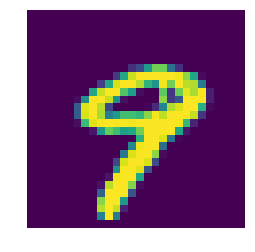

Label =  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Class probabilities =  [[  5.28820287e-14   1.61565119e-12   1.47112888e-12   1.99402633e-10
    8.20477112e-07   1.07506337e-09   4.57562201e-15   8.61227306e-07
    3.80472631e-09   9.99998331e-01]]


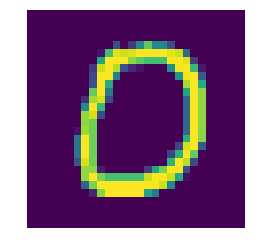

Label =  [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Class probabilities =  [[  1.00000000e+00   3.50560683e-12   1.00434594e-09   1.73949210e-14
    8.60713218e-16   3.75027960e-12   9.13440157e-11   2.25712261e-11
    1.23941948e-12   4.15561162e-11]]


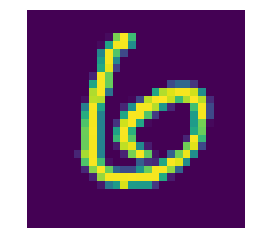

Label =  [[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
Class probabilities =  [[  1.41643053e-09   7.71405238e-14   1.62943230e-15   5.57100261e-15
    2.53674198e-13   1.26207560e-11   1.00000000e+00   4.33625261e-15
    3.95802037e-11   7.02078399e-16]]


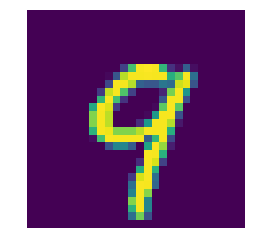

Label =  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
Class probabilities =  [[  3.76756785e-12   1.12312442e-11   3.20851019e-11   2.01345451e-09
    2.59802891e-05   6.02736749e-09   2.61297559e-12   4.99466495e-08
    6.30753760e-09   9.99974012e-01]]


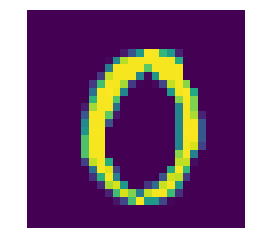

Label =  [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Class probabilities =  [[  1.00000000e+00   1.98105139e-12   1.07032493e-12   2.90848210e-14
    8.34232247e-15   6.83068185e-12   1.36369707e-08   4.16134821e-10
    5.86183532e-12   1.50796278e-10]]


In [0]:
for i in range(5):
    batch = mnist.test.next_batch(1)
    image = np.asarray(batch[0]).reshape((28, 28))
    label = batch[1]
    
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    print "Label = ", label
    print "Class probabilities = ", y_probs.eval(feed_dict={
        x: batch[0], y_: batch[1], keep_prob: 1.0})

### PyTorch Implementation: Softmax Regression Model

In [1]:
# Import torch and torchvision
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn.functional as func

In [2]:
# Download the MNIST data and save it to the data folder. This will be the training data
# Each index contains a PILOW image followed by the ground truth classification label
# Add data normalization?
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset  = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

In [4]:
class MyNN(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        # What is this line of code doing?
        super(MyNN, self).__init__()
        # Apply a linear transformation to the data using weights and bias
        # The weights and bias are randomly initialized when the network is initialized
        self.linear = torch.nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

# Initialize the neural network; applies a linear transformation on the input and produces an output
net = MyNN(784, 10)

# Apply cross entropy loss. Includes softmax on the input and then appleis cross entropy loss?
losses = torch.nn.CrossEntropyLoss()
# Use Stochastic Gradient Descent to find optimal parameters, given by net.parameters()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

In [5]:
nn_model_path = 'nn_model_path.pt'
nn_min_loss = 100
epochs = 25
for e in range(epochs):
    # Get loss per epoch
    running_loss = 0
    correct = 0
    incorrect = 0
    for i, (X, y) in enumerate(trainloader):
        # Reshape image to be a vector
        input_img = Variable(X.view(-1, 784))
        labels = Variable(y)
        # Make the gradients 0 to find the next gradient, ensuring it does accumulate over mulitple propogations
        optimizer.zero_grad()
        # Get the output from the linear layer (applies weights through matrix multiplcation + bias)
        output = net(input_img)
        # Determine softmax and corresponding cross-entropy losses
        loss = losses(output, labels)
        # Back propogate all of the network parameters (given to optimizer through net.parmaeters())
        loss.backward()
        # Update the parameters
        optimizer.step()
        running_loss = running_loss + loss.item()

        # Because no validation set is present, find the losses and accuracy
        # for the training data and leave the test set untouched
        _, predicted = torch.max(output, 1)
        incorrect += (predicted != y).sum()
        correct+= (predicted == y).sum()
    
    loss = running_loss/len(trainloader)
    if loss < nn_min_loss:
        torch.save(net.state_dict(), nn_model_path)
    print(f"Epoch {e + 1} - Loss: {loss}; Accuracy {correct.item()/((correct + incorrect).item())}")

Epoch 1 - Loss: 0.38892401290436585; Accuracy 0.8904333333333333
Epoch 2 - Loss: 0.3066756847500801; Accuracy 0.9121166666666667
Epoch 3 - Loss: 0.29286309465765953; Accuracy 0.91775
Epoch 4 - Loss: 0.2840219158803423; Accuracy 0.9200833333333334
Epoch 5 - Loss: 0.2800561156993111; Accuracy 0.9209166666666667
Epoch 6 - Loss: 0.27568515633543333; Accuracy 0.9228
Epoch 7 - Loss: 0.27201200465361275; Accuracy 0.9237
Epoch 8 - Loss: 0.2694089550276597; Accuracy 0.9243833333333333
Epoch 9 - Loss: 0.2683580391854048; Accuracy 0.9248166666666666
Epoch 10 - Loss: 0.2660045335317651; Accuracy 0.9259
Epoch 11 - Loss: 0.2651610257104039; Accuracy 0.9262833333333333
Epoch 12 - Loss: 0.26284146048128604; Accuracy 0.92675
Epoch 13 - Loss: 0.26166963908821345; Accuracy 0.9263666666666667
Epoch 14 - Loss: 0.2609050259863337; Accuracy 0.9275166666666667
Epoch 15 - Loss: 0.25981875630716483; Accuracy 0.9281833333333334
Epoch 16 - Loss: 0.2582667912170291; Accuracy 0.9276666666666666
Epoch 17 - Loss: 0.2

In [6]:
# Determine accuracy on testing data
def get_nn_accuracy(custom_model=None):
    
    if custom_model is not None: 
        #net = MyNN(784, 10)
        net.load_state_dict(torch.load(custom_model))
        
    correct = 0
    incorrect = 0
    # Use the weights for the saved model
    with torch.no_grad():
        for images, labels in testloader:
            images = Variable(images.view(-1, 784))
            y = Variable(labels)
            outputs = net(images)
            # Get the max along the probabilities
            # Using softmax; highest output will be have highest softmax output
            _, predicted = torch.max(outputs, 1)
            incorrect += (predicted != y).sum()
            correct+= (predicted == y).sum()
        total = correct + incorrect
        accuracy = correct.item()/total.item()
    return accuracy

In [7]:
get_nn_accuracy()

0.9261

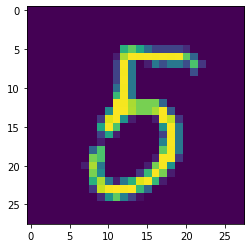

Predicted: 5
Correct Label: 5




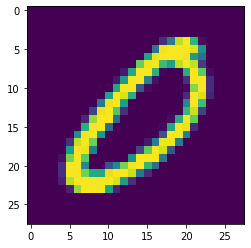

Predicted: 0
Correct Label: 0




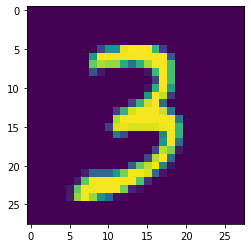

Predicted: 3
Correct Label: 3




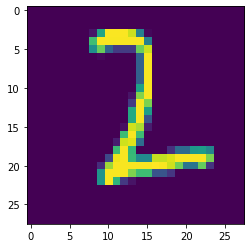

Predicted: 2
Correct Label: 2




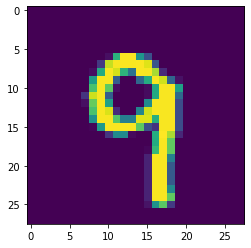

Predicted: 9
Correct Label: 9




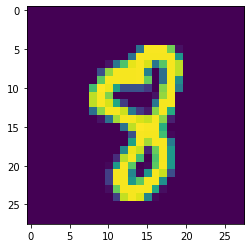

Predicted: 8
Correct Label: 8




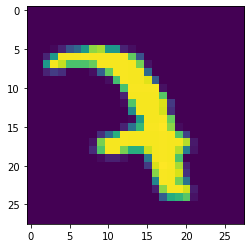

Predicted: 2
Correct Label: 7




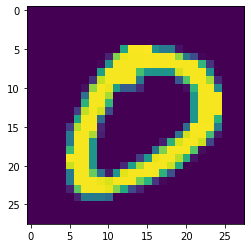

Predicted: 0
Correct Label: 0




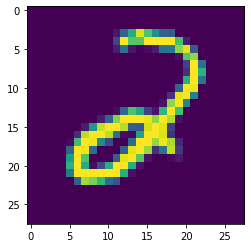

Predicted: 2
Correct Label: 2




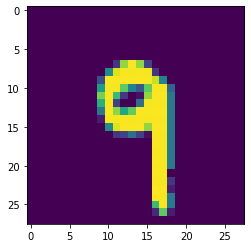

Predicted: 9
Correct Label: 9




In [8]:
# Plots of 10 random test data and their corresponding results
it = iter(testloader)
with torch.no_grad():
    for i in range(10):
        idx = np.random.randint(0, 99, 1)[0]
        image, label = [x[idx] for x in next(it)]
        img = Variable(image.view(-1, 784))
        out= net(img)
        _, predicted = torch.max(out, 1)

        plt.imshow(image.numpy().reshape(28, 28));
        plt.show()
        print(f'Predicted: {predicted.item()}')
        print(f'Correct Label: {label.item()}')
        print('\n')

PyTorch Implementation: MLP for MNIST Data

In [41]:
class MyMLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyMLP, self).__init__()
        self.linear = torch.nn.Linear(input_dim, hidden_dim, bias=True)
        self.hidden = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        first_layer_output = self.linear(x)
        activation_output = func.relu(first_layer_output)
        hidden_layer_output = self.hidden(activation_output)
        return hidden_layer_output

# Initialize the neural network; applies a linear transformation on the input and produces an output
mlp_net = MyMLP(784, 512, 10)

# Update model initialization to make biases 0.1 and for weights to be from 
# a normal distribution with a mean of 0 and standard deviation of 0.1
mlp_net.linear.bias.data = torch.ones_like(mlp_net.linear.bias).fill_(0.1)
mlp_net.linear.weight.data = torch.ones_like(mlp_net.linear.weight).normal_(mean=0, std=0.1)
mlp_net.hidden.bias.data = torch.ones_like(mlp_net.hidden.bias).fill_(0.1)
mlp_net.hidden.weight.data = torch.ones_like(mlp_net.hidden.weight).normal_(mean=0, std=0.1)

#if use_cuda and torch.cuda.is_available():
#  mlp_net.cuda()
# Apply cross entropy loss. Includes softmax on the input and then appleis cross entropy loss?
losses = torch.nn.CrossEntropyLoss()
# Use Adam optimizer
optimizer = torch.optim.Adam(mlp_net.parameters(), lr=1e-4)

In [42]:
# Use dataloader to train model
mlp_min_loss = 100
mlp_model_path = 'mlp_model.pt'
epochs = 25
for e in range(epochs):
    # Get loss per epoch
    running_loss = 0
    correct = 0
    incorrect = 0
    for i, (X, y) in enumerate(trainloader):
        # Reshape image to be a vector
        input_img = Variable(X.view(-1, 784))
        labels = Variable(y)
        # Make the gradients 0 to find the next gradient, ensuring it does accumulate over mulitple propogations
        optimizer.zero_grad()
        # Get the output from the linear layer (applies weights through matrix multiplcation + bias)
        output = mlp_net(input_img)
        # Determine softmax and corresponding cross-entropy losses
        loss = losses(output, labels)
        # Back propogate all of the network parameters (given to optimizer through net.parmaeters())
        loss.backward()
        # Update the parameters
        optimizer.step()
        running_loss = running_loss + loss.item()
        _, predicted = torch.max(output, 1)
        incorrect += (predicted != y).sum()
        correct+= (predicted == y).sum()
    
    loss = running_loss/len(trainloader)
    if loss < mlp_min_loss:
        torch.save(mlp_net.state_dict(), mlp_model_path) 
    print(f"Epoch {e + 1} - Loss: {loss}; Accuracy {correct.item()/((correct + incorrect).item())}")

Epoch 1 - Loss: 0.6496529193967581; Accuracy 0.8105
Epoch 2 - Loss: 0.27398117413123446; Accuracy 0.9236166666666666
Epoch 3 - Loss: 0.2136820700392127; Accuracy 0.9413166666666667
Epoch 4 - Loss: 0.1795375484476487; Accuracy 0.95045
Epoch 5 - Loss: 0.15503912655636667; Accuracy 0.9576833333333333
Epoch 6 - Loss: 0.13617842408517997; Accuracy 0.9630166666666666
Epoch 7 - Loss: 0.12121470652520656; Accuracy 0.967
Epoch 8 - Loss: 0.10868549209708969; Accuracy 0.9709166666666667
Epoch 9 - Loss: 0.09806733561058839; Accuracy 0.9739
Epoch 10 - Loss: 0.08893612760429581; Accuracy 0.9765166666666667
Epoch 11 - Loss: 0.08101521594760319; Accuracy 0.97875
Epoch 12 - Loss: 0.07401816554367542; Accuracy 0.9809166666666667
Epoch 13 - Loss: 0.06785853407966594; Accuracy 0.9827
Epoch 14 - Loss: 0.062423592728252215; Accuracy 0.98455
Epoch 15 - Loss: 0.05752673404446493; Accuracy 0.9858166666666667
Epoch 16 - Loss: 0.052883374559072154; Accuracy 0.9873166666666666
Epoch 17 - Loss: 0.04870188843769332

In [43]:
# Determine accuracy on testing data
def get_mlp_accuracy(custom_model=None):
  # Use the weights for the saved model
    if custom_model is not None:
        #mlp_net = MyMLP(784, 512, 10)
        mlp_net.load_state_dict(torch.load(custom_model))
    mlp_correct = 0
    mlp_incorrect = 0
    with torch.no_grad():
        for images, labels in testloader:
            images = Variable(images.view(-1, 784))
            y = Variable(labels)
            outputs = mlp_net(images)
            # Get the max along axis 1
            # Using softmax; highest output will be have highest softmax output
            _, predicted = torch.max(outputs, 1)
            mlp_incorrect += (predicted != y).sum()
            mlp_correct+= (predicted == y).sum()
        total = mlp_correct + mlp_incorrect
        accuracy = mlp_correct.item()/total.item()
    return accuracy

In [44]:
get_mlp_accuracy()

0.9794

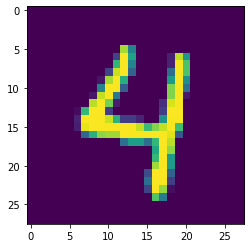

Predicted: 4
Correct Label: 4




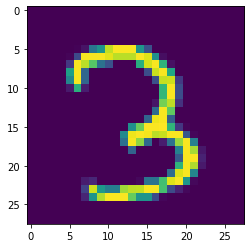

Predicted: 3
Correct Label: 3




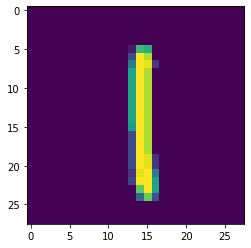

Predicted: 1
Correct Label: 1




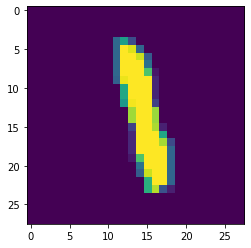

Predicted: 1
Correct Label: 1




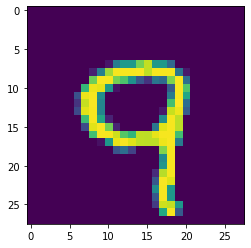

Predicted: 9
Correct Label: 9




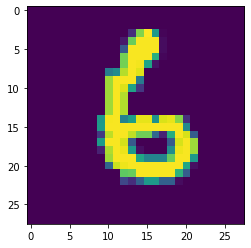

Predicted: 6
Correct Label: 6




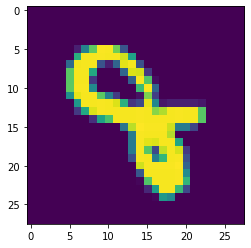

Predicted: 4
Correct Label: 8




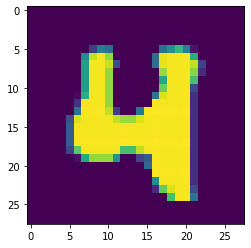

Predicted: 4
Correct Label: 4




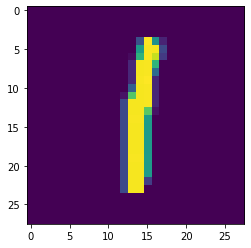

Predicted: 1
Correct Label: 1




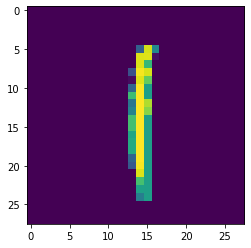

Predicted: 1
Correct Label: 1




In [21]:
# Plots of 10 random test data and their corresponding results
it = iter(testloader)
with torch.no_grad():
    for i in range(10):
        idx = np.random.randint(0, 99, 1)[0]
        image, label = [x[idx] for x in next(it)]
        img = Variable(image.view(-1, 784))
        out= mlp_net(img)
        _, predicted = torch.max(out, 1)

        plt.imshow(image.numpy().reshape(28, 28));
        plt.show()
        print(f'Predicted: {predicted.item()}')
        print(f'Correct Label: {label.item()}')
        print('\n')

PyTorch implementation of LeNet

In [35]:
class MyLeNet(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyLeNet, self).__init__()
        self.conv_layer_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, 
                            stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        self.conv_layer_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=32, out_channels=64,
                            kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        self.hidden = torch.nn.Linear(7*7*64, 1024, bias=True)
        self.drop_out = torch.nn.Dropout()
        self.output_layer = torch.nn.Linear(1024, 10, bias=True)

    def forward(self, x):
        first_layer_output = self.conv_layer_1(x)
        second_layer_output = self.conv_layer_2(first_layer_output)
        # Flatten the image before going into the hidden lyer
        # Where input_dim is 7*7*64
        second_layer_output = Variable(second_layer_output.view(-1, 7*7*64))
        hidden_layer_output = self.hidden(second_layer_output)
        activation_output = func.relu(hidden_layer_output)
        dropout_layer_output = self.drop_out(activation_output)
        output_layer = self.output_layer(dropout_layer_output)
        return output_layer
    
    # Think of a better way to do this
    def update_bias_variable(self, layer):
        layer.bias.data = torch.ones_like(layer.bias).fill_(0.1)
        return layer.bias.data
    
    def update_weight_variable(self, layer):
        layer.weight.data = torch.ones_like(layer.weight).normal_(mean=0, std=0.1)
        return layer.weight.data

# Initialize the neural network; applies a linear transformation on the input and produces an output
le_net = MyLeNet(7*7*64, 1024, 10)

# Update model initialization to make biases 0.1 and for weights to be from 
# a normal distribution with a mean of 0 and standard deviation of 0.1
le_net.output_layer.bias.data = le_net.update_bias_variable(le_net.output_layer)
le_net.output_layer.weight.data = le_net.update_weight_variable(le_net.output_layer)
le_net.hidden.bias.data = le_net.update_bias_variable(le_net.hidden)
le_net.hidden.weight.data = le_net.update_weight_variable(le_net.hidden)

# Apply cross entropy loss. Includes softmax on the input and then appleis cross entropy loss?
le_net_losses = torch.nn.CrossEntropyLoss()
# Use Adam optimizer
optimizer = torch.optim.Adam(le_net.parameters(), lr=1e-4)

In [36]:
# Use dataloader to train model
min_loss = 100
le_net_model_path = 'le_net_model.pt'
epochs = 25
for e in range(epochs):
    # Get loss per epoch
    running_loss = 0
    correct = 0
    incorrect= 0
    for i, (X, y) in enumerate(trainloader):
        # Reshape image to be a vector
        input_img = Variable(X)
        labels = Variable(y)
        # Make the gradients 0 to find the next gradient, ensuring it does accumulate over mulitple propogations
        optimizer.zero_grad()
        # Get the output from the linear layer (applies weights through matrix multiplcation + bias)
        output = le_net(input_img)
        # Determine softmax and corresponding cross-entropy losses
        loss = le_net_losses(output, labels)
        # Back propogate all of the network parameters (given to optimizer through net.parmaeters())
        loss.backward()
        # Update the parameters
        optimizer.step()
        running_loss = running_loss + loss.item()
        _, predicted = torch.max(output, 1)
        incorrect += (predicted != y).sum()
        correct+= (predicted == y).sum()
    
    loss = running_loss/len(trainloader)
    if loss < min_loss:
        torch.save(le_net.state_dict(), le_net_model_path) 
    print(f"Epoch {e + 1} - Loss: {loss}; Accuracy {correct.item()/((correct + incorrect).item())}")

Epoch 1 - Loss: 0.6568407486130794; Accuracy 0.8014666666666667
Epoch 2 - Loss: 0.24321169082075358; Accuracy 0.9299833333333334
Epoch 3 - Loss: 0.17843292143195869; Accuracy 0.9486166666666667
Epoch 4 - Loss: 0.1433244003696988; Accuracy 0.9592
Epoch 5 - Loss: 0.12134957240273556; Accuracy 0.9646833333333333
Epoch 6 - Loss: 0.1073636065547665; Accuracy 0.9685333333333334
Epoch 7 - Loss: 0.0953947831193606; Accuracy 0.97235
Epoch 8 - Loss: 0.08584824550586442; Accuracy 0.97515
Epoch 9 - Loss: 0.07864885285807152; Accuracy 0.97685
Epoch 10 - Loss: 0.07226711149637897; Accuracy 0.9791666666666666
Epoch 11 - Loss: 0.06552739158272743; Accuracy 0.98045
Epoch 12 - Loss: 0.061736458463904756; Accuracy 0.9821666666666666
Epoch 13 - Loss: 0.05812819453732421; Accuracy 0.9830166666666666
Epoch 14 - Loss: 0.05393638497684151; Accuracy 0.9839166666666667
Epoch 15 - Loss: 0.05053422317374498; Accuracy 0.9851166666666666
Epoch 16 - Loss: 0.048176178523960216; Accuracy 0.9856833333333334
Epoch 17 - 

In [51]:
# Determine accuracy on testing data
def get_le_net_accuracy(custom_model=None):
    # Use the weights for the saved model
    if custom_model is not None:
        #le_net = MyLeNet(7 * 7 * 64, 1024, 10)
        le_net.load_state_dict(torch.load(custom_model))

    le_net_correct = 0
    le_net_incorrect = 0
    with torch.no_grad():
        for (images, labels) in testloader:
            images = Variable(images)
            y = Variable(labels)
            outputs = le_net(images)
            # Get the max along axis 1
            # Using softmax; highest output will be have highest softmax output
            _, predicted = torch.max(outputs, 1)
            le_net_incorrect += (predicted != y).sum()
            le_net_correct+= (predicted == y).sum()
    total = le_net_correct + le_net_incorrect
    accuracy = le_net_correct.item()/total.item()
    return accuracy

In [52]:
get_le_net_accuracy()

0.9847

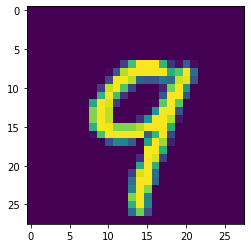

Predicted: 9
Correct Label: 9




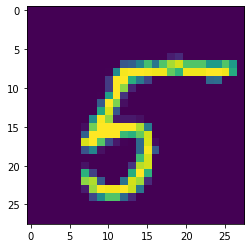

Predicted: 5
Correct Label: 5




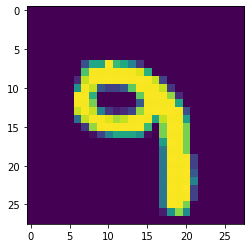

Predicted: 9
Correct Label: 9




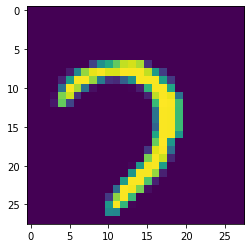

Predicted: 7
Correct Label: 7




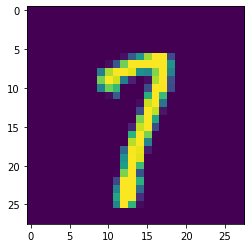

Predicted: 7
Correct Label: 7




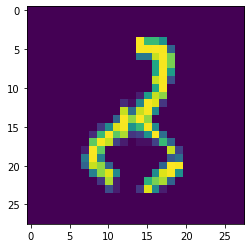

Predicted: 2
Correct Label: 8




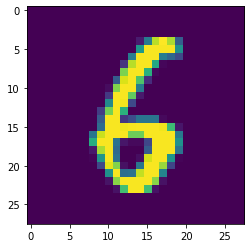

Predicted: 6
Correct Label: 6




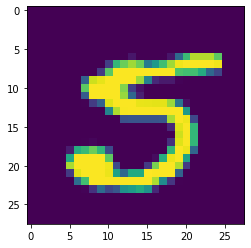

Predicted: 5
Correct Label: 5




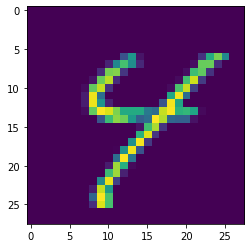

Predicted: 4
Correct Label: 4




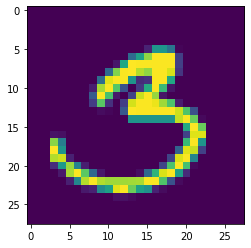

Predicted: 3
Correct Label: 3




In [53]:
# Plots of 10 random test data and their corresponding results
iters = iter(testloader)
with torch.no_grad():
    for r in range(10):
        idx = np.random.randint(0, 99, 1)[0]
        image, label = [x[idx] for x in next(iters)]
        img = Variable(image[None])
        out= le_net(img)
        _, predicted = torch.max(out, 1)

        plt.imshow(image.numpy().reshape(28, 28));
        plt.show()
        print(f'Predicted: {predicted.item()}')
        print(f'Correct Label: {label.item()}')
        print('\n')

### Rerun accuracy test using saved weights

In [54]:
nn_accuracy = get_nn_accuracy(custom_model='nn_model_path.pt')
mlp_accuracy = get_mlp_accuracy(custom_model='mlp_model.pt')
le_net_accuracy = get_le_net_accuracy(custom_model='le_net_model.pt')
print(f'Softmax Regressor Accuracy: {nn_accuracy}')
print(f'MLP Accuracy: {mlp_accuracy}')
print(f'Le_Net Accuracy: {le_net_accuracy}')

Softmax Regressor Accuracy: 0.9261
MLP Accuracy: 0.9794
Le_Net Accuracy: 0.9837
